## Homework 4 (bar charts)

For this homework assignment you are required to use Python (pandas and matplotlib) to do the exercises. Please write your own code and provide your code along with your responses to the questions.

### Getting Started

Import the following libraries to use in the homework set:

In [2]:
!pip install highlight_text

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import highlight_text as ht
import matplotlib.image as mpimg
import math

For this homework we will use a world immigration/emigration data set for the years 1980 to 2013. The data set shows the numbers of people moving in and out of 45 different countries each year based on place of birth, citizenship, or place of previous / next residence.
* Data source:  [International migration flows to and from selected countries - The 2015 revision](https://www.un.org/development/desa/pd/data/international-migration-flows)

From the previous homework set, we grouped together all immigrant and all emigrant rows. To ensure consistency, please begin by loading the "immigrants.csv" and "emigrants.csv" files that are provided on Canvas.


In [5]:
df_immigrants = pd.read_csv("immigrants.csv", index_col = 0)
df_emigrants = pd.read_csv("emigrants.csv", index_col = 0)

In [6]:
df_immigrants.head()

,CntName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Armenia,0,0,0,0,0,0,0,0,0,...,1514,1497,1335,1112,864,861,0,0,0,0
1,Australia,184290,212690,195200,153570,153530,172550,196690,221620,253860,...,350990,363470,402210,460650,535970,0,0,0,0,0
2,Austria,0,0,0,0,0,0,0,0,0,...,245094,228930,197070,145724,147544,138590,141956,164460,183114,203732
3,Azerbaijan,0,0,0,0,0,0,0,0,0,...,2407,2019,2232,1970,3597,2292,0,0,0,0
4,Belarus,0,0,0,0,0,0,0,0,0,...,14641,13031,14124,14155,17412,19891,0,0,0,0


In [7]:
df_emigrants.head()

,CntName,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Armenia,0,0,0,0,0,0,0,0,0,...,8451,9303,8053,7461,6121,4100,0,0,0,0
1,Australia,90860,85600,92340,100510,96360,93440,92450,97770,104770,...,212200,206690,204800,216580,220280,0,0,0,0,0
2,Austria,0,0,0,0,0,0,0,0,0,...,143442,140266,148864,99796,103126,106488,103302,102394,103624,108142
3,Azerbaijan,0,0,0,0,0,0,0,0,0,...,2800,2919,2644,3090,2530,1373,0,0,0,0
4,Belarus,0,0,0,0,0,0,0,0,0,...,12510,11082,8498,9479,9268,7643,0,0,0,0


### Problem 1 (3 points)

Using the **immigration** data, make two bar charts. You may use vertical or horizontal bars for either chart.
* Bar chart 1 -- compare the number of immigrants to the following countries in the year **2000**:  Australia, New Zealand, Belgium, Italy, and the Netherlands
* Bar chart 2 -- compare the number of immigrants to Australia across the years **1995 to 2004** (inclusive)

For each chart,
* Sort the categories in a way that makes sense (e.g. high to low or alphabetical for chart 1, by time for chart 2)
* Label the bar values directly (you can adjust the units to make the labels fit)
* Remove unnecessary axis lines or legends
* Add a title and a description of the units
* Make all text horizontal


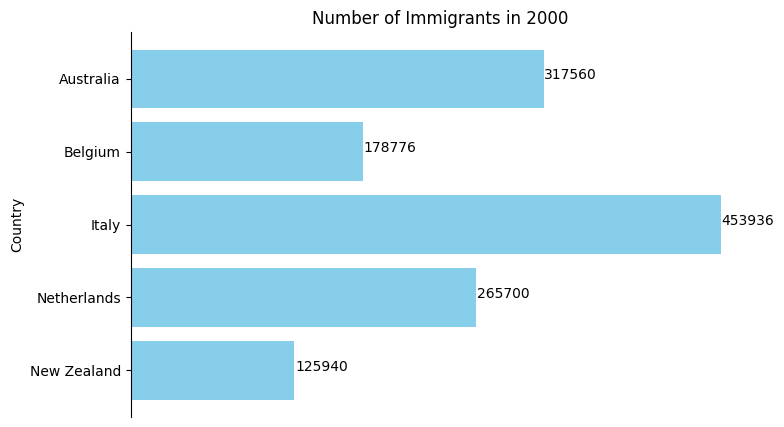

In [8]:
# ---------------- CHART 1 ----------------
# Extracting immigration data for selected countries in the year 2000
selected_countries = ["Australia", "New Zealand", "Belgium", "Italy", "Netherlands"]
df_chart1 = df_immigrants[df_immigrants["CntName"].isin(selected_countries)][["CntName", "2000"]]

# Sorting alphabetically
df_chart1 = df_chart1.sort_values("CntName")

# Plot Chart 1
# Create the figure and axes first
plt.figure(figsize=(8, 5))
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis tick labels (numbers)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.barh(df_chart1["CntName"], df_chart1["2000"], color="skyblue")
plt.ylabel("Country")
plt.title("Number of Immigrants in 2000")
plt.gca().invert_yaxis()

# Annotate values
for index, value in enumerate(df_chart1["2000"]):
    plt.text(value + 500, index, str(value))

plt.show()

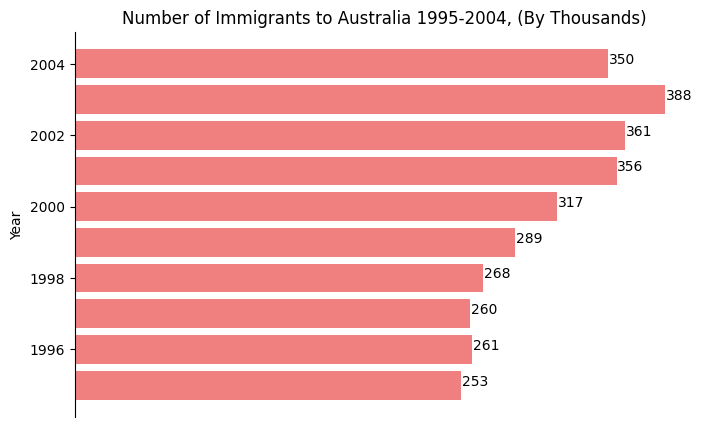

In [9]:
# ---------------- CHART 2 ----------------
# Extracting immigration data to Australia from 1995 to 2004
df_chart2 = df_immigrants[df_immigrants["CntName"] == "Australia"][["CntName"] + [str(year) for year in range(1995, 2005)]]
df_chart2 = df_chart2.melt(id_vars=["CntName"], var_name="Year", value_name="Immigrants")

# Convert Year to integer for sorting
df_chart2["Year"] = df_chart2["Year"].astype(int)

# Plot Chart 2
# Create the figure and axes first
plt.figure(figsize=(8, 5))
ax = plt.gca()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove x-axis tick labels (numbers)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

plt.barh(df_chart2["Year"], df_chart2["Immigrants"], color="lightcoral")
plt.ylabel("Year")
plt.title("Number of Immigrants to Australia 1995-2004, (By Thousands)")

# Annotate values
for index, value in enumerate(df_chart2["Immigrants"]):
    plt.text(value + 500, index + 1995, str(math.trunc(value/1000)))

plt.show()

### Problem 2 (2 points)

Adjust your previous bar charts to present the "lollipop" chart style.
* Reduce the width of the bars
* For chart 1, place a small image of each country's flag at the top of its bar so that the top of the flag is aligned vertically with the top of the bar (images on Canvas are provided from https://www.countryflags.com/ )
* For chart 2, place a circle at the top of each bar (use the top of the bar as the center coordinate of the circle, and make sure the circles do not overlap)
* You may need to adjust the positioning of the bar values

Some hints
* Check out documentation online or this article https://towardsdatascience.com/how-to-add-an-image-to-a-matplotlib-plot-in-python-76098becaf53 to add images to pyplot charts
* A scatter plot makes for a great way to include circles!


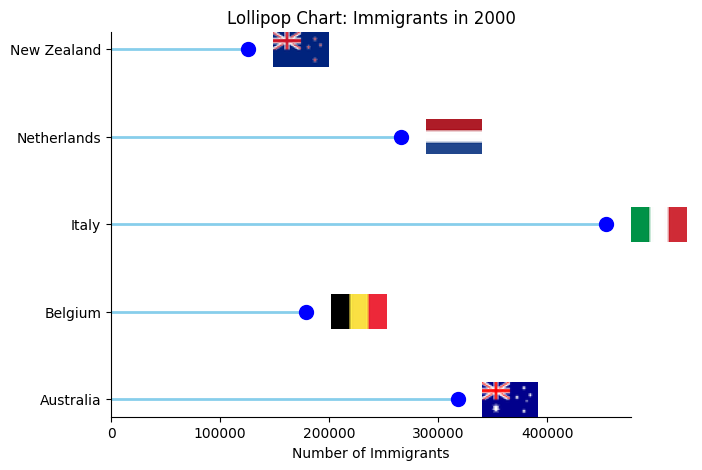

In [10]:
# ---------------- LOLLIPOP CHART 1 ----------------
# Create the lollipop chart
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the lines (sticks)
ax.hlines(y=df_chart1["CntName"], xmin=0, xmax=df_chart1["2000"], color="skyblue", linewidth=2, zorder=1)

# Plot small dots at the end of the lines
ax.scatter(df_chart1["2000"], df_chart1["CntName"], color="blue", s=100)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Align y-axis to zero position
ax.set_xlim(left=0)  # Force x-axis to start from zer

# Fixed offset and zoom
flag_offset = df_chart1["2000"].max() * 0.05
fixed_size = (40, 25)  # Width, Height in pixels (adjust as needed)

# Add country flags at the end of each bar
for value, country in zip(df_chart1["2000"], df_chart1["CntName"]):
    try:
        # Use the first three letters of the country name in lowercase for the filename
        flag_filename = f"flags/{country[:3].lower()}.jpg"

        # Open and resize the image to a fixed size
        img = Image.open(flag_filename)
        # Use PIL.Image.Resampling.LANCZOS
        img_resized = img.resize(fixed_size, Image.Resampling.LANCZOS)

        # Convert to numpy array for matplotlib compatibility
        img_array = np.array(img_resized)

        # Add resized flag with consistent positioning
        imagebox = OffsetImage(img_array, zoom=1)
        ab = AnnotationBbox(imagebox, (value + flag_offset, country), frameon=False, box_alignment=(0, 0.5))
        ax.add_artist(ab)

    except FileNotFoundError:
        print(f"Flag for {country} ({flag_filename}) not found. Skipping.")

# Formatting
ax.set_xlabel("Number of Immigrants")
ax.set_title("Lollipop Chart: Immigrants in 2000")

# Adjust plot margins to prevent clipping
plt.subplots_adjust(left=0.2, right=0.85)

plt.show()

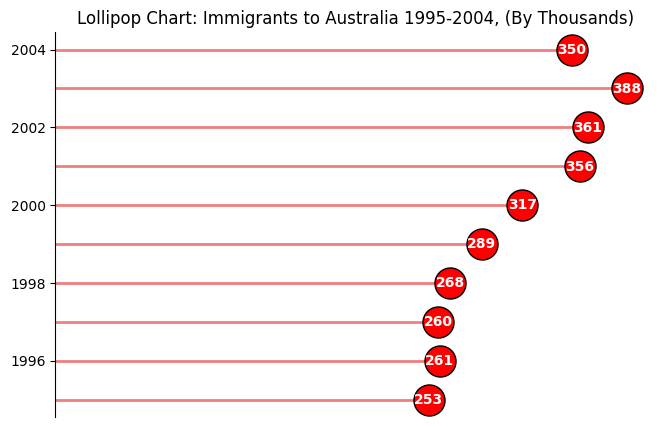

In [11]:
# ---------------- LOLLIPOP CHART 2 ----------------
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the lines (sticks)
ax.hlines(y=df_chart2["Year"], xmin=0, xmax=df_chart2["Immigrants"], color="lightcoral", linewidth=2, zorder=1)

# Plot circles at the end of the bars
ax.scatter(df_chart2["Immigrants"], df_chart2["Year"], color="red", s=500, edgecolors='black', linewidths=1, zorder=2)

# Add bar value annotations INSIDE the circles
for x, y, value in zip(df_chart2["Immigrants"], df_chart2["Year"], df_chart2["Immigrants"]):
    ax.text(x, y,
            str(value // 1000),
            ha='center',
            va='center',
            fontsize=10,
            color='white',
            fontweight='bold',
            zorder=3)

# Hide top, right, and bottom spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)  # Remove the bottom axis

# Remove x-axis tick labels (numbers)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Align y-axis to zero position
ax.set_xlim(left=0)  # Force x-axis to start from zero

# Adjust plot margins to prevent clipping
plt.subplots_adjust(left=0.15, right=0.9)

# Formatting
ax.set_title("Lollipop Chart: Immigrants to Australia 1995-2004, (By Thousands)")

plt.show()

### Problem 3 (3 points)

Adjust your bar charts from part 1 to be "paired" bar charts that now include **emigration** data for each category.
* Use contrasting colors (e.g. "tab:blue" for immigration bars and "tab:orange" for emigration bars)
* Instead of labelling bars directly, use light gridlines that run perpendicular to the bars and reinstate a units axis
* Adjust the titles of your charts and include the legend directly by coloring words like "Immigrant" and "Emigrant" appropriately

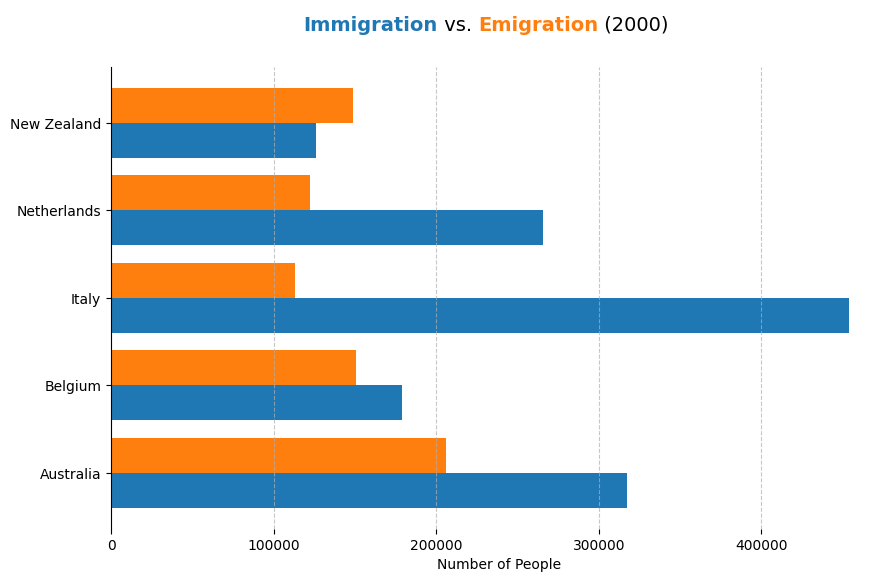

In [12]:
# ----------------- CHART 1: Immigration vs. Emigration in 2000 -----------------

# Data Preparation
selected_countries = ["Australia", "New Zealand", "Belgium", "Italy", "Netherlands"]
df_chart1_imm = df_immigrants[df_immigrants["CntName"].isin(selected_countries)][["CntName", "2000"]]
df_chart1_em = df_emigrants[df_emigrants["CntName"].isin(selected_countries)][["CntName", "2000"]]

# Merging for paired comparison
df_chart1 = pd.merge(df_chart1_imm, df_chart1_em, on="CntName", suffixes=('_Immigrants', '_Emigrants'))

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(df_chart1["CntName"]))

# Immigrant bars
ax.barh(index - bar_width/2, df_chart1["2000_Immigrants"], bar_width, label='Immigrants', color='tab:blue')

# Emigrant bars
ax.barh(index + bar_width/2, df_chart1["2000_Emigrants"], bar_width, label='Emigrants', color='tab:orange')

# Customization
ax.set_yticks(index)
ax.set_yticklabels(df_chart1["CntName"])
ax.set_xlabel("Number of People")

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Create a title with highlighted text
title_text = "<Immigration> vs. <Emigration> (2000)"
ht.fig_text(0.5, 0.95, title_text,
            highlight_textprops=[{"color": "tab:blue", "weight": "bold"},
                                 {"color": "tab:orange", "weight": "bold"}],
            ha='center', va='center', fontsize=14)

# Light gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

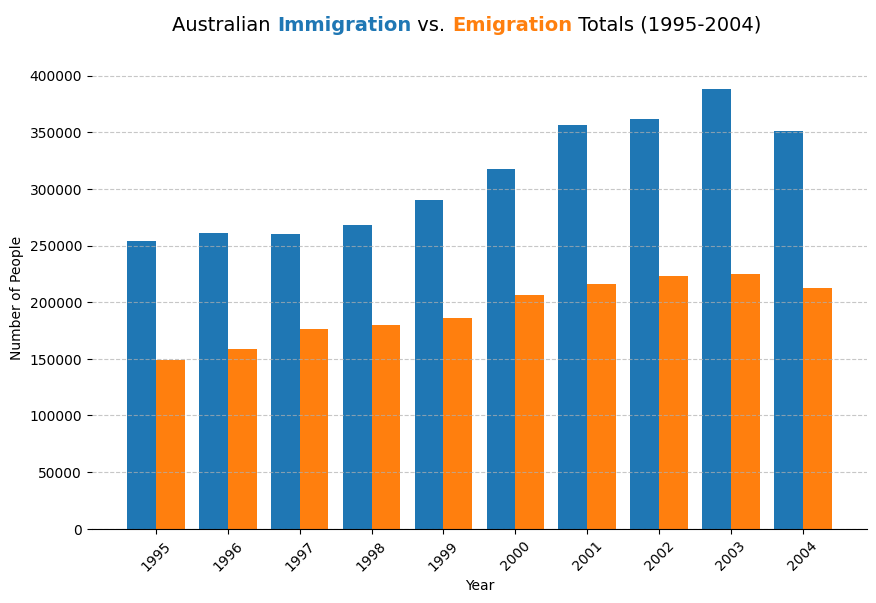

In [13]:
# ----------------- CHART 2: Immigration vs. Emigration to Australia (1995-2004) -----------------

# Data Preparation
years = [str(year) for year in range(1995, 2005)]
df_chart2_imm = df_immigrants[df_immigrants["CntName"] == "Australia"][["CntName"] + years]
df_chart2_em = df_emigrants[df_emigrants["CntName"] == "Australia"][["CntName"] + years]

# Reshape for paired comparison
df_chart2_imm = df_chart2_imm.melt(id_vars="CntName", var_name="Year", value_name="Immigrants")
df_chart2_em = df_chart2_em.melt(id_vars="CntName", var_name="Year", value_name="Emigrants")

# Merging
df_chart2 = pd.merge(df_chart2_imm, df_chart2_em, on=["CntName", "Year"])
df_chart2["Year"] = df_chart2["Year"].astype(int)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width and positioning
bar_width = 0.4
index = np.arange(len(df_chart2["Year"].unique()))

# Immigrant bars
ax.bar(index - bar_width/2, df_chart2["Immigrants"], width=bar_width, label='Immigrants', color='tab:blue')

# Emigrant bars
ax.bar(index + bar_width/2, df_chart2["Emigrants"], width=bar_width, label='Emigrants', color='tab:orange')

# --------------------Customization-----------------------
# Hide top, right, and bottom spines for cleaner look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_ylabel("Number of People")
ax.set_xlabel("Year")

# Create a title with highlighted text
title_text = "Australian <Immigration> vs. <Emigration> Totals (1995-2004)"
ht.fig_text(0.5, 0.95, title_text,
            highlight_textprops=[{"color": "tab:blue", "weight": "bold"},
                                 {"color": "tab:orange", "weight": "bold"}],
            ha='center', va='center', fontsize=14)

# Adjust x-axis ticks to display years
ax.set_xticks(index)
ax.set_xticklabels(df_chart2["Year"].unique(), rotation=45)

# Light gridlines for y-axis
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


### Problem 4 (2 points)

Adjust your bar charts from part 3 to be "diverging" bar charts
* Use horizontal bars, with zero as the center value
* Place immigration bars to the right of center, and emigration bars to the left of center

One trick to create a diverging bar chart in pyplot is to use both positive and negative values
* Make sure to relabel the units axis so that all numbers are positive though

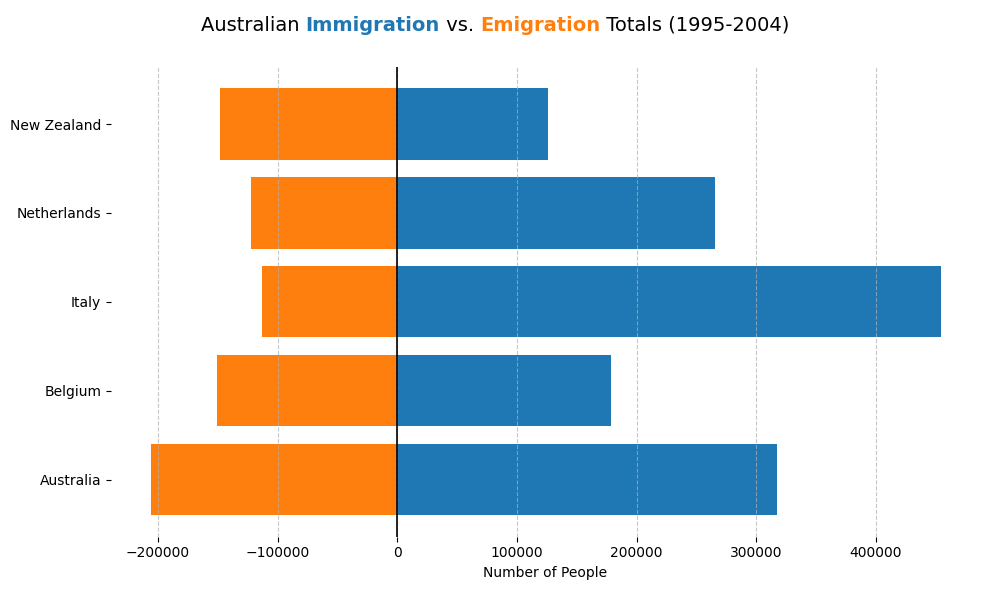

In [14]:
# Extracting immigration and emigration data for the year 2000
df_chart1_imm = df_immigrants[df_immigrants["CntName"].isin(selected_countries)][["CntName", "2000"]]
df_chart1_em = df_emigrants[df_emigrants["CntName"].isin(selected_countries)][["CntName", "2000"]]

# Merging the data for paired comparison
df_chart1 = pd.merge(df_chart1_imm, df_chart1_em, on="CntName", suffixes=('_Immigrants', '_Emigrants'))

# Converting emigration values to negative for diverging effect
df_chart1["2000_Emigrants"] = -df_chart1["2000_Emigrants"]

# Plotting the diverging bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
ax.barh(df_chart1["CntName"], df_chart1["2000_Immigrants"], color='tab:blue', label='Immigrants')
ax.barh(df_chart1["CntName"], df_chart1["2000_Emigrants"], color='tab:orange', label='Emigrants')

# Customization
ax.axvline(0, color='black', linewidth=1.2)  # Centerline for diverging effect
ax.set_xlabel("Number of People")

# Create a title with highlighted text
title_text = "Australian <Immigration> vs. <Emigration> Totals (1995-2004)"
ht.fig_text(0.5, 0.95, title_text,
            highlight_textprops=[{"color": "tab:blue", "weight": "bold"},
                                 {"color": "tab:orange", "weight": "bold"}],
            ha='center', va='center', fontsize=14)

# Remove spines/axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Adding gridlines
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-19-186e8c46ca00>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([f"{abs(int(y))}" for y in ax.get_yticks()])


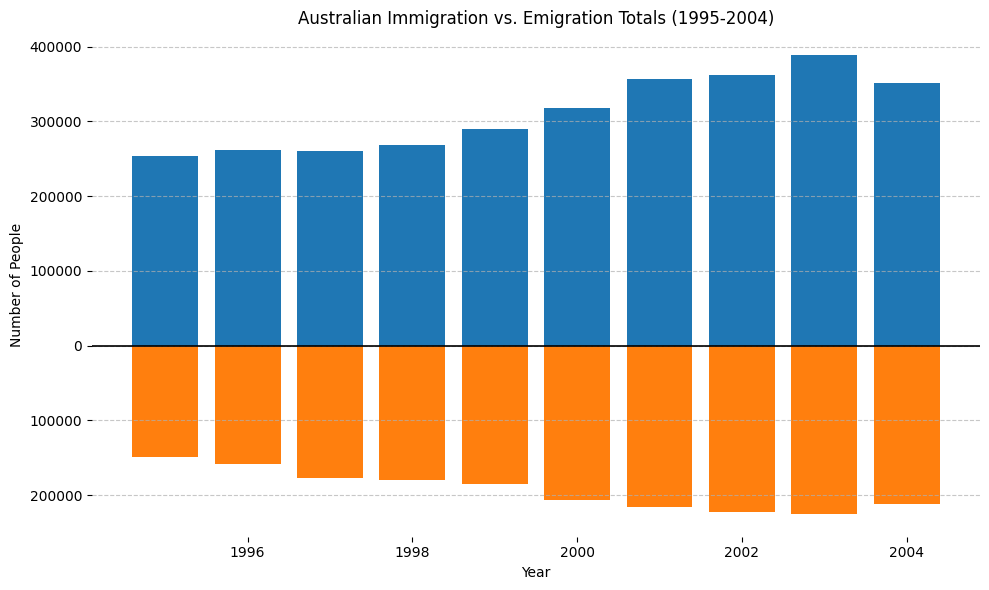

In [19]:
# Merging the data
df_chart2 = pd.merge(df_chart2_imm, df_chart2_em, on=["CntName", "Year"])
df_chart2["Year"] = df_chart2["Year"].astype(int)

# Converting emigrant values to negative for diverging effect
df_chart2["Emigrants"] = -df_chart2["Emigrants"]

# Plotting the diverging bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the bars
ax.bar(df_chart2["Year"], df_chart2["Immigrants"], color='tab:blue', label='Immigrants')
ax.bar(df_chart2["Year"], df_chart2["Emigrants"], color='tab:orange', label='Emigrants')

# Customization
ax.axhline(0, color='black', linewidth=1.2)  # Centerline for diverging effect
ax.set_ylabel("Number of People")
ax.set_xlabel("Year")

# Remove spines/axis lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_title("Australian Immigration vs. Emigration Totals (1995-2004)")

# Formatting y-axis to display positive numbers
# Find the maximum absolute value for setting the y-axis range
ax.set_yticklabels([f"{abs(int(y))}" for y in ax.get_yticks()])

# Adding gridlines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

### Examples

Here are some charts to compare your work against. You do not have to recreate these exactly, but they should help give you an idea of what to make.

Problem 1:

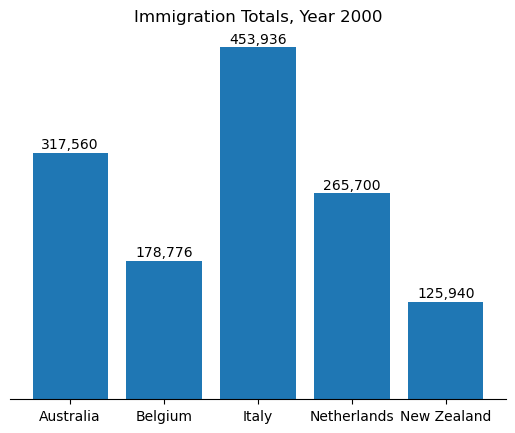

In [ ]:
# Chart 1

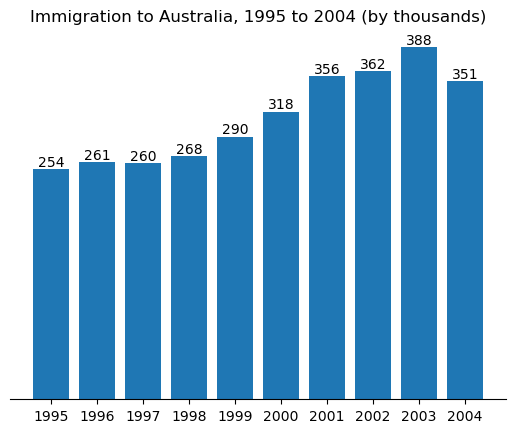

In [ ]:
# Chart 2

Problem 2

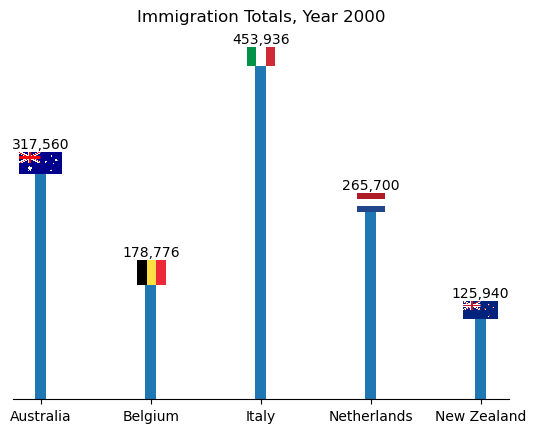

In [ ]:
# Chart 1

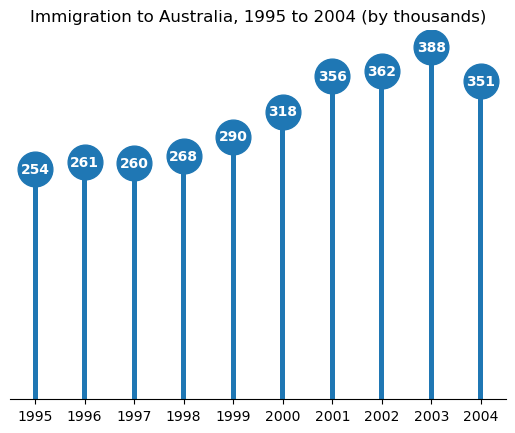

In [ ]:
# Chart 2

Problem 3

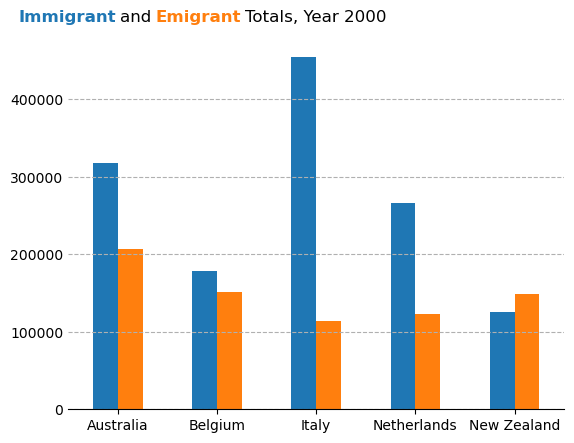

In [ ]:
# Chart 1

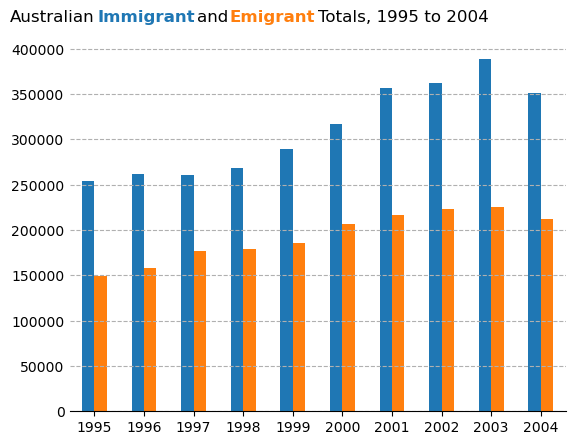

In [ ]:
# Chart 2

Problem 4

C:\Users\10502190\AppData\Local\Temp\ipykernel_324076\3689985106.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vals)


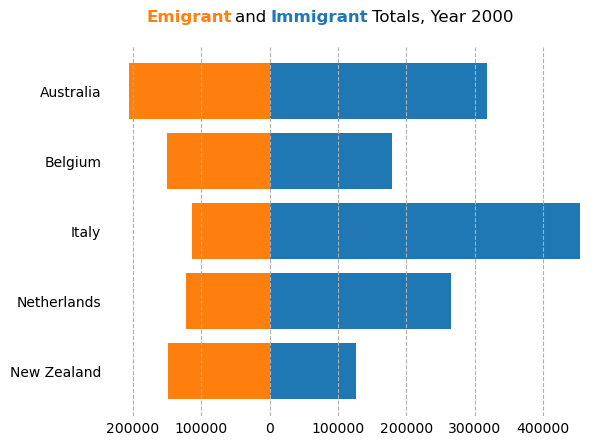

In [ ]:
# Chart 1

C:\Users\10502190\AppData\Local\Temp\ipykernel_324076\3595920960.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(vals)


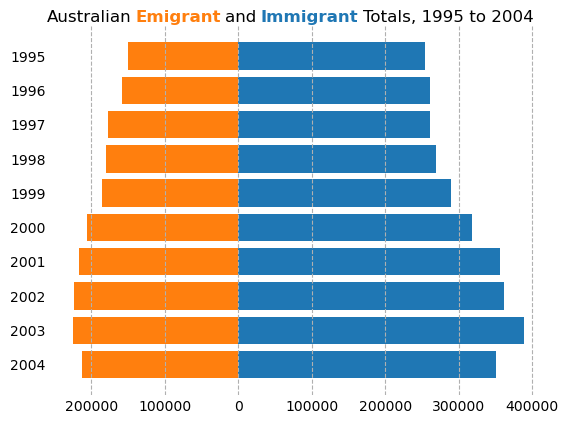

In [ ]:
# Chart 2